In this notebook I will explore condition of patients who did not show a lot of progress or regress.

For this let's import pickled scores file

In [1]:
import pandas as pd
import numpy as np

In [2]:
scores = pd.read_pickle('pickled_scores.pkl')

scores.head(3)

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level,treated,result
0,condition_1,11,2,35-39,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,0.0,35,39,Unipolar depressive,2,Outpatient,5.0
1,condition_2,18,2,40-44,1.0,2.0,6-10,2.0,2.0,24.0,11.0,2.0,0.0,40,44,Bipolar second,3,Outpatient,10.0
2,condition_3,13,1,45-49,2.0,2.0,6-10,2.0,2.0,24.0,25.0,3.0,0.0,45,49,Unipolar depressive,2,Outpatient,5.0


In [3]:
scores = scores[scores['result'] == 5]

scores.head(3)

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,madrs2,id,group,min_age,max_age,aff_type,observed_level,treated,result
0,condition_1,11,2,35-39,2.0,2.0,6-10,1.0,2.0,19.0,19.0,1.0,0.0,35,39,Unipolar depressive,2,Outpatient,5.0
2,condition_3,13,1,45-49,2.0,2.0,6-10,2.0,2.0,24.0,25.0,3.0,0.0,45,49,Unipolar depressive,2,Outpatient,5.0
4,condition_5,13,2,50-54,2.0,2.0,11-15,2.0,2.0,26.0,26.0,5.0,0.0,50,54,Unipolar depressive,2,Outpatient,5.0


In [4]:
# 9 patients

ids = scores['id'].values

ids

array([ 1.,  3.,  5.,  7.,  9., 11., 17., 20., 22.])

In [5]:
group = ['condition_'+str(round(index))+'.csv' for index in ids]

group

['condition_1.csv',
 'condition_3.csv',
 'condition_5.csv',
 'condition_7.csv',
 'condition_9.csv',
 'condition_11.csv',
 'condition_17.csv',
 'condition_20.csv',
 'condition_22.csv']

Firstly, I would like to work with one file, as an example then implement all code into function and run that function for every file

In [8]:
current = pd.read_csv('data/condition/' + group[0])

In [9]:
def descibe_file(path):
    
    
    
    print(f'Shape of the file {current.shape}')
    print()
    
    print(f'First five rows look like {current.head()}')
    print()
    
    print(current.describe())
    print()
    
    print('Empty values')
    print(current.isnull().sum())
    print()
    
    print('Info')
    print(current.info())
    print()
    
    
    

In [10]:
descibe_file(current)

Shape of the file (23244, 3)

First five rows look like              timestamp        date  activity
0  2003-05-07 12:00:00  2003-05-07         0
1  2003-05-07 12:01:00  2003-05-07       143
2  2003-05-07 12:02:00  2003-05-07         0
3  2003-05-07 12:03:00  2003-05-07        20
4  2003-05-07 12:04:00  2003-05-07       166

           activity
count  23244.000000
mean     146.948030
std      294.592424
min        0.000000
25%        0.000000
50%        9.000000
75%      172.000000
max     3526.000000

Empty values
timestamp    0
date         0
activity     0
dtype: int64

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23244 entries, 0 to 23243
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  23244 non-null  object
 1   date       23244 non-null  object
 2   activity   23244 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 544.9+ KB
None



Next let's plot timestamp and activity level

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def basic_plot(dataframe):
    plt.figure(figsize=(12, 8), dpi = 100)
    
    plt.title('Overall activity level by time for patient')
    
    plt.plot(dataframe['timestamp'], dataframe['activity'])
    plt.xlabel('Time')
    plt.ylabel('Activity')
    plt.grid()
    plt.show()
    plt.close()

In [13]:
#basic_plot(current)

Well, this took a lot of time and it's not even presentable. I should somehow this issue.

First thing that popped up is to visualize patients activity by time. I think that is pretty good idea to create subplots in big plot for every day

In [14]:
current

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166
...,...,...,...
23239,2003-05-23 15:19:00,2003-05-23,0
23240,2003-05-23 15:20:00,2003-05-23,0
23241,2003-05-23 15:21:00,2003-05-23,0
23242,2003-05-23 15:22:00,2003-05-23,0


In [15]:
len(current['date'].unique())

17

We can see that current patient was observed 17 days

In [16]:
def create_day_col(df):
    df['date'] = pd.to_datetime(df['date'], '%YY-%mm-%dd')
    
    return df['date'].dt.day



In [17]:
current.loc[0]

timestamp    2003-05-07 12:00:00
date                  2003-05-07
activity                       0
Name: 0, dtype: object


if len(current['date'].unique()) % 2 == 0:
   
    fig, axs = plt.subplots(len(current['date'].unique()) // 2, 2, figsize = (12, 8), dpi = 100)

else:
   
    fig, axs = plt.subplots(len(current['date'].unique()) // 2 + 1, 2, figsize = (12, 8), dpi = 100)
    


    
for day in range(len(current['date'].unique()) // 2):
    
    date = current['date'].unique()[day]
    
    axs[day, 0].plot(current.loc[current['date'] == date, 'timestamp'], current.loc[current['date'] == date, 'activity'])
    

for day in range(len(current['date'].unique()) // 2, len(current['date'].unique())):
    
    date = current['date'].unique()[day]
    
    axs[day - 8, 1].plot(current.loc[current['date'] == date, 'timestamp'], current.loc[current['date'] == date, 'activity'])
    

plt.show()

plt.close()

I guess, this how it should like but it's also not so clear and understandable

Now let's try to group this values for better visualization. Firstly, I will group values by hours, then days

In [18]:
current.head()

,timestamp,date,activity
0,2003-05-07 12:00:00,2003-05-07,0
1,2003-05-07 12:01:00,2003-05-07,143
2,2003-05-07 12:02:00,2003-05-07,0
3,2003-05-07 12:03:00,2003-05-07,20
4,2003-05-07 12:04:00,2003-05-07,166


In [19]:
def create_hour(current):
    
    return pd.to_datetime(current['timestamp'], format = '%Y-%m-%d %H:%M:%S').dt.hour

for file in group:
    my_file = 'data/condition/' + file
    
    df = pd.read_csv(my_file)
    
    df['hour'] = create_hour(df)

In [20]:
check = pd.read_csv('data/condition/' + 'condition_3.csv')

check.head()

,timestamp,date,activity
0,2003-05-19 15:00:00,2003-05-19,7
1,2003-05-19 15:01:00,2003-05-19,8
2,2003-05-19 15:02:00,2003-05-19,7
3,2003-05-19 15:03:00,2003-05-19,8
4,2003-05-19 15:04:00,2003-05-19,7


In [21]:
def visualize_by_results(group):
    for file in group:

        my_file = 'data/condition/' + file

        df = pd.read_csv(my_file)

        df['hour'] = create_hour(df)

        by_hour = df.groupby('hour')['activity'].mean()

        plt.figure(figsize=(15, 5), dpi = 100)

        plt.title(f'Patient {file} activity level by hours')

        plt.plot(by_hour.index, by_hour.values)

        plt.xticks(range(24))
        plt.ylim(0, 500)

        plt.xlabel('Hour')
        plt.ylabel('Activity lvl')

        plt.grid()

        plt.show()

        plt.close()

This one is for patients who did not show any results.

In [22]:
#visualize_by_results(group)

What we can gain here is nothing special in activities, high on day with some decrease afternoon. For better understanding let's plot other two groups 

In [23]:
scores = pd.read_pickle('pickled_scores.pkl')

In [24]:


better = scores.loc[scores['result'] == 10, 'number'].values

better = [i + '.csv' for i in better]

better

['condition_2.csv',
 'condition_4.csv',
 'condition_6.csv',
 'condition_8.csv',
 'condition_10.csv',
 'condition_12.csv',
 'condition_13.csv',
 'condition_14.csv',
 'condition_18.csv',
 'condition_19.csv',
 'condition_21.csv']

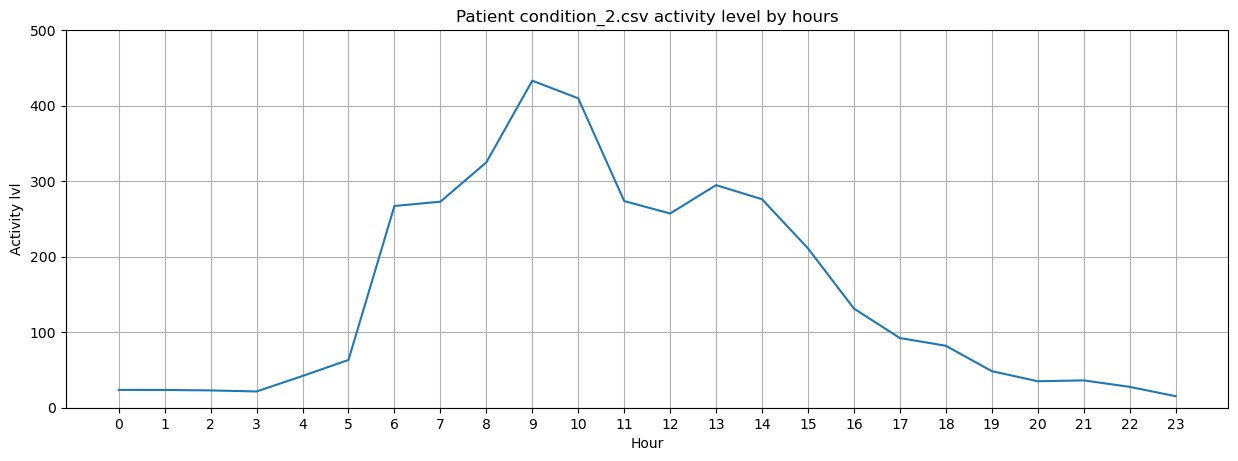

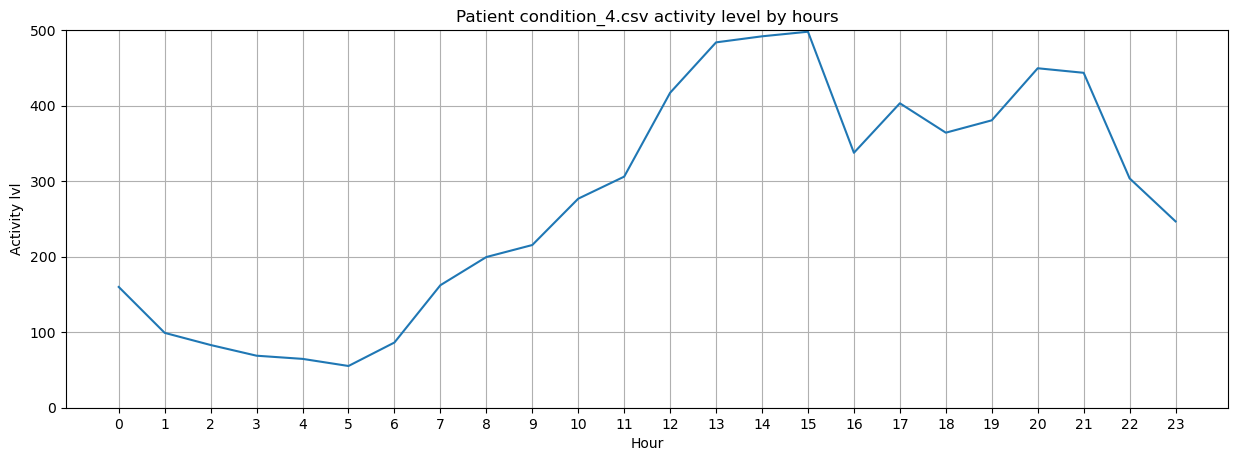

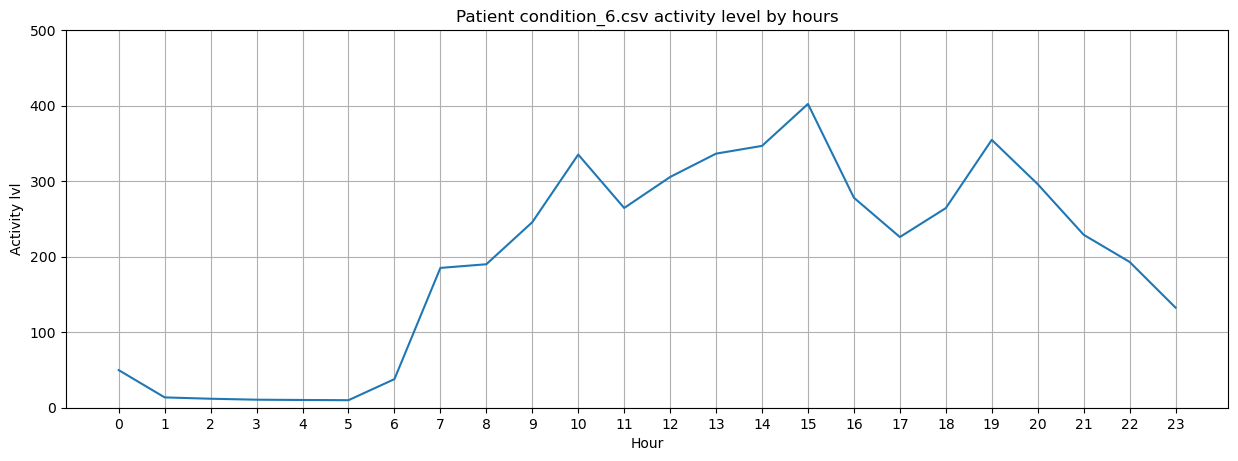

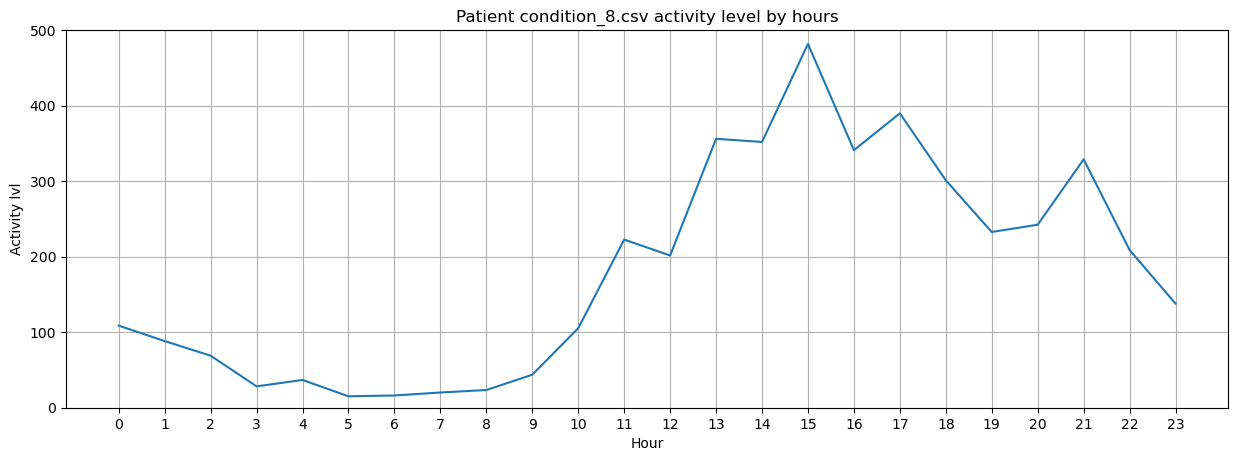

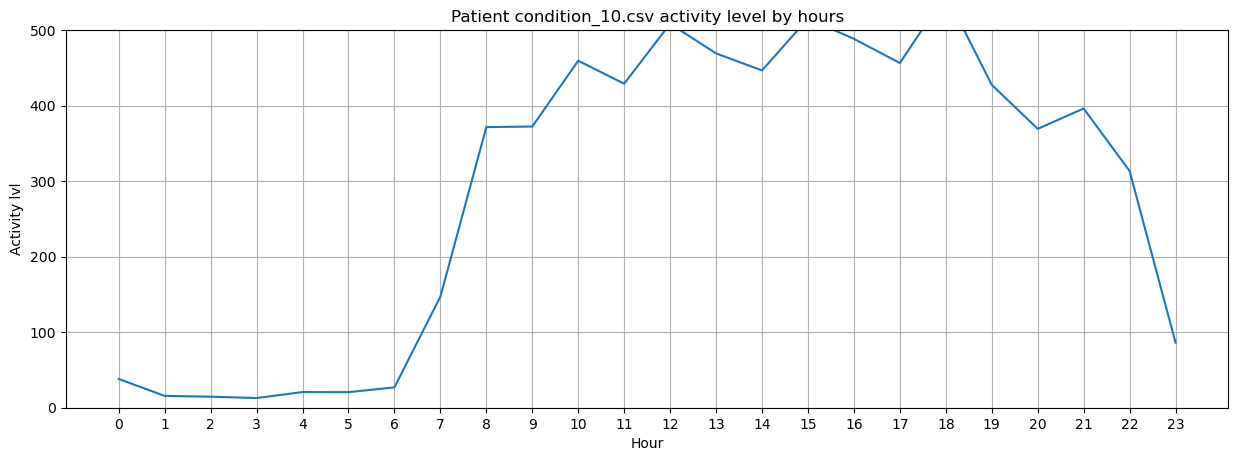

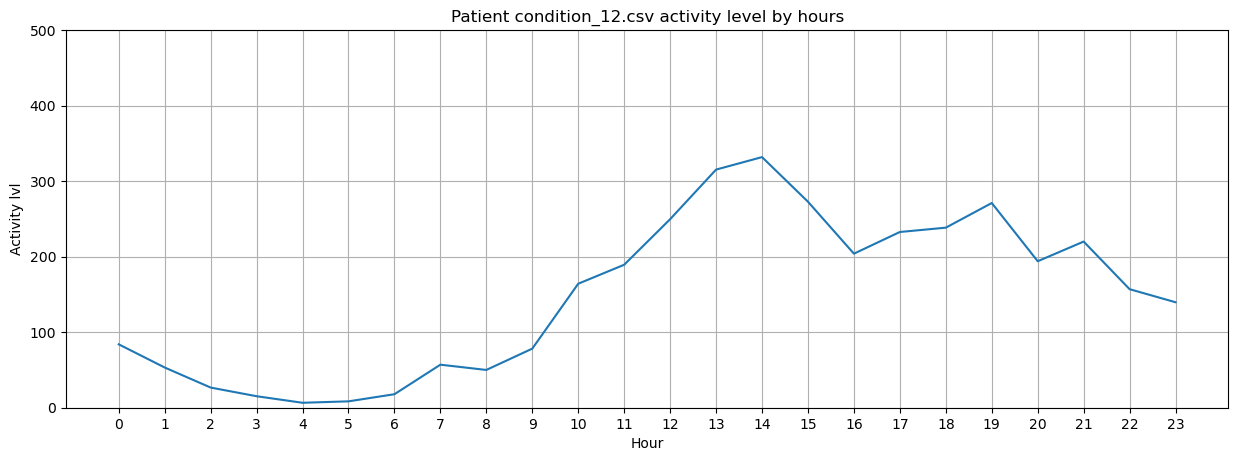

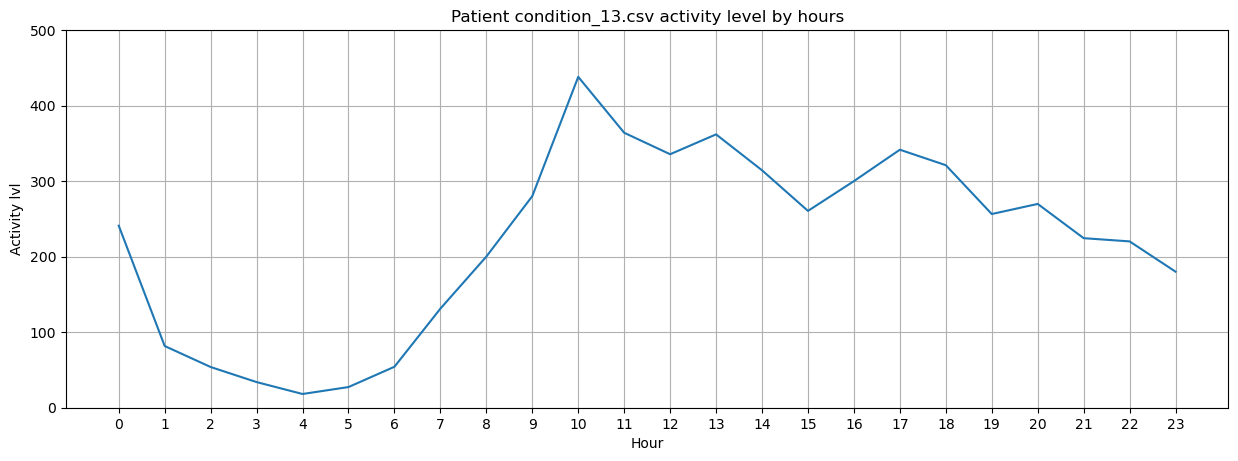

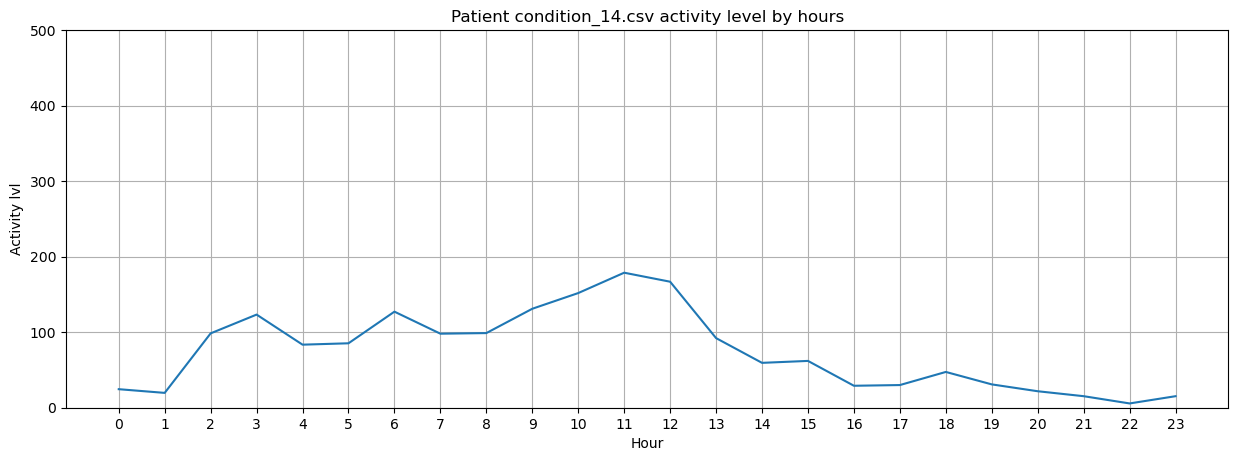

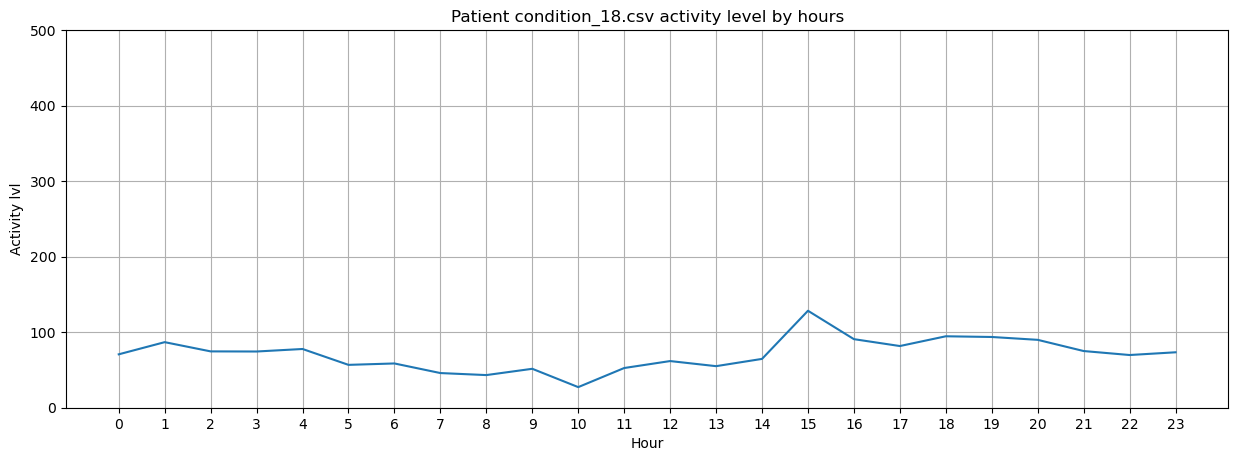

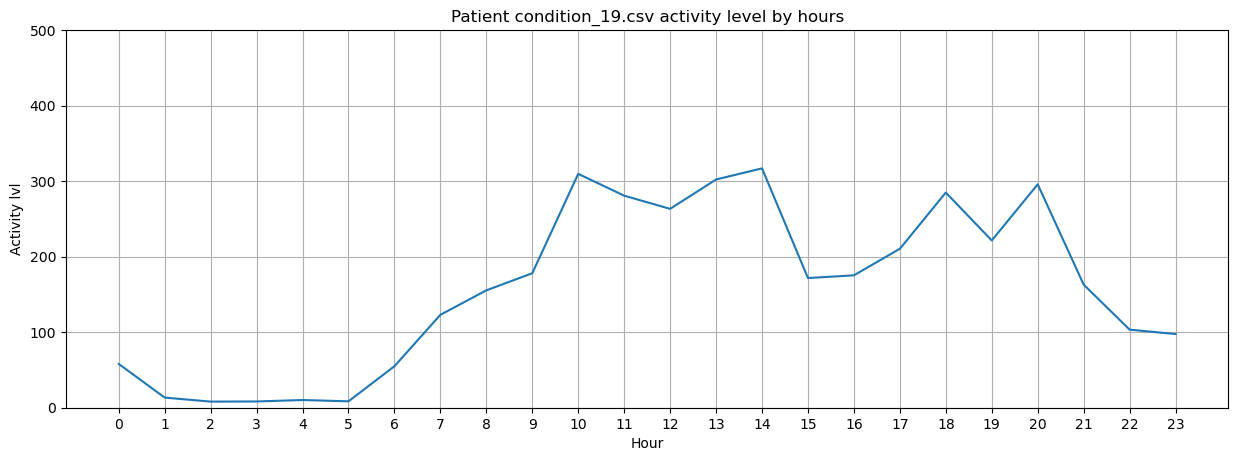

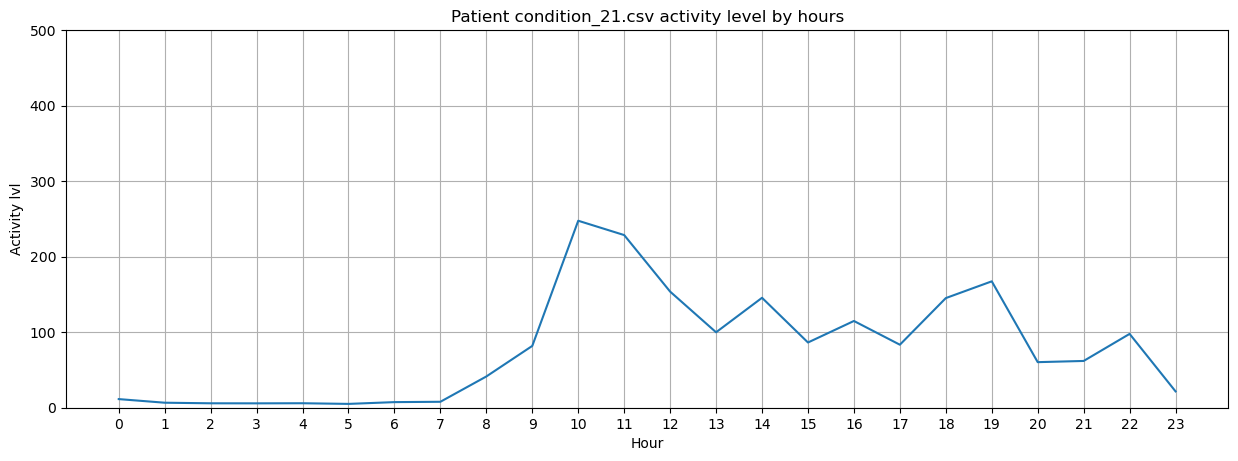

In [25]:
visualize_by_results(better)

Last group

In [26]:
worsen = scores.loc[scores['result'] == 0, 'number'].values

worsen = [i + '.csv' for i in worsen]

worsen

['condition_15.csv', 'condition_16.csv']

In [27]:
#visualize_by_results(worsen)

Looks kinda similar to me, may be because of these patients were grouped by results they showed, not by disease they had.

Also, values were grouped by hour and we got mean value, which can be biased and little bit skewed

Now, let's try to visualize actograph of patients by their disease type

In [28]:
bi_sec = scores[scores['afftype'] == 1]['number']

bi_sec
bi_sec = [i + '.csv' for i in bi_sec]

#visualize_by_results(bi_sec)

In [29]:
uni_dep = scores[scores['afftype'] == 2]['number']


uni_dep = [i + '.csv' for i in uni_dep]

#visualize_by_results(uni_dep)

In [30]:
#bi_first = scores[scores['afftype'] == 3]['number']

#bi_first = [i + '.csv' for i in bi_first]

#visualize_by_results(bi_first)


This graphs were interesting to observe, but there's one thing missing: I did not pay attention to order of days. Because, as patients were treated we expect to see changes in their condition

For this purpose, let's create scatter plot for each group 

In [31]:
def scatter_forgroup(group):
    
    ymax = 4000
    
    for file in group:
        
        curr = pd.read_csv('data/condition/' + file)
        
        fig, ax = plt.subplots(figsize=(18,6))
        
        ax.scatter(x = 'timestamp', y = 'activity', data = curr, alpha = 0.4)
        
        ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # reduce number of x-axis labels
        ax.set_ylim(0, ymax)
        plt.title(my_file)
        plt.xticks(rotation=90)
        plt.grid()
        
        plt.show()
        
        plt.close()
    

    

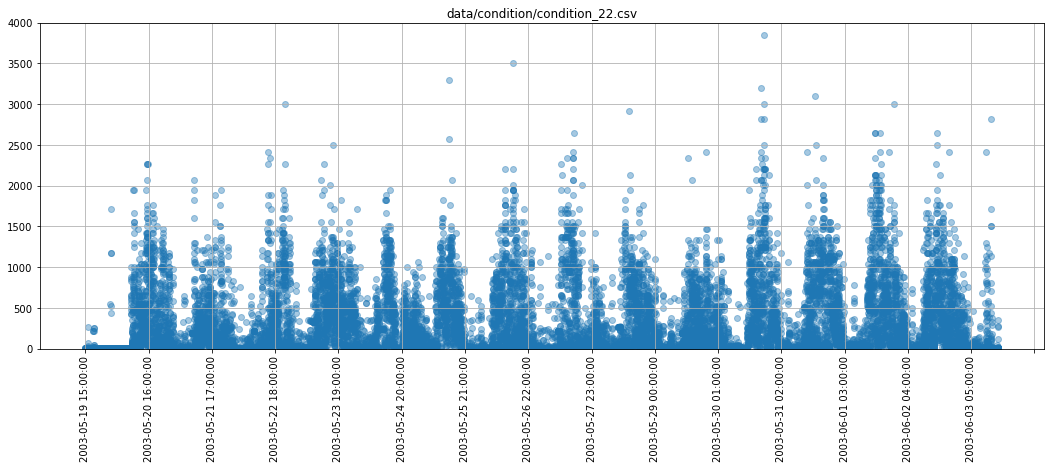

In [32]:
scatter_forgroup(['condition_3.csv'])

Let's check median, mean for every patients activity level by day 

In [33]:
def get_average_by_day(file):
    
    curr = pd.read_csv('data/condition/' + file)
    
    print(curr['activity'].median())
    print(curr['activity'].mean())
    print(curr['activity'].std())
    
    for day in curr['date'].unique():
        
        dd = curr[curr['date'] == day]['activity']
        
        print(f"Mean activity level for {day} is {dd.mean()}")
        print(f"Median activity level for {day} is {dd.median()}")
        print(f"Stadard deviation of activity level for {day} is {dd.std()}")
        
        print('-' * 6)

In [34]:
get_average_by_day(bi_sec[0])

9.0
153.66474849714842
330.8017162750168
Mean activity level for 2003-05-07 is 73.65
Median activity level for 2003-05-07 is 4.0
Stadard deviation of activity level for 2003-05-07 is 191.0405004705458
------
Mean activity level for 2003-05-08 is 259.6451388888889
Median activity level for 2003-05-08 is 99.0
Stadard deviation of activity level for 2003-05-08 is 371.8445202384897
------
Mean activity level for 2003-05-09 is 244.09652777777777
Median activity level for 2003-05-09 is 103.0
Stadard deviation of activity level for 2003-05-09 is 325.6532960107547
------
Mean activity level for 2003-05-10 is 155.42430555555555
Median activity level for 2003-05-10 is 9.5
Stadard deviation of activity level for 2003-05-10 is 254.5103103775313
------
Mean activity level for 2003-05-11 is 116.46388888888889
Median activity level for 2003-05-11 is 6.0
Stadard deviation of activity level for 2003-05-11 is 211.52494094285376
------
Mean activity level for 2003-05-12 is 224.54166666666666
Median activ

In [35]:
get_average_by_day(uni_dep[0])

9.0
146.94802959903632
294.5924238266065
Mean activity level for 2003-05-07 is 174.14444444444445
Median activity level for 2003-05-07 is 76.0
Stadard deviation of activity level for 2003-05-07 is 240.05388528648587
------
Mean activity level for 2003-05-08 is 156.24722222222223
Median activity level for 2003-05-08 is 27.0
Stadard deviation of activity level for 2003-05-08 is 229.10977669416798
------
Mean activity level for 2003-05-09 is 124.13541666666667
Median activity level for 2003-05-09 is 14.0
Stadard deviation of activity level for 2003-05-09 is 211.2412777146756
------
Mean activity level for 2003-05-10 is 134.96180555555554
Median activity level for 2003-05-10 is 33.0
Stadard deviation of activity level for 2003-05-10 is 230.95473189730802
------
Mean activity level for 2003-05-11 is 99.43958333333333
Median activity level for 2003-05-11 is 15.0
Stadard deviation of activity level for 2003-05-11 is 177.7199715455079
------
Mean activity level for 2003-05-12 is 316.8743055555

Now, I decided to extract average activity level, minumum and maximum, also std for each patient and create that columns in scores dataset

In [36]:
def patients_info(file):
    
    group = ''
    if 'condition' in file:
        group = 'condition'
    elif 'control' in file:
        group = 'control'
    else:
        return 'There no such kind of patient. Please, check correctness of file name!'
    
    curr = pd.read_csv('data/' + group + '/' + file + '.csv')
    
    return [round(curr['activity'].mean(), 2), curr['activity'].median(), round(curr['activity'].std(), 2), curr['activity'].min(), curr['activity'].max()]
    
    
    

In [37]:
scores[['mean', 'median', 'std', 'min', 'max']] = list(scores['number'].apply(lambda x: patients_info(x)))

In [38]:
scores.head()

,number,days,gender,age,afftype,inpatient,edu,marriage,work,madrs1,...,max_age,aff_type,observed_level,treated,result,mean,median,std,min,max
0,condition_1,11,2,35-39,2.0,2.0,6-10,1.0,2.0,19.0,...,39,Unipolar depressive,2,Outpatient,5.0,146.95,9.0,294.59,0,3526
1,condition_2,18,2,40-44,1.0,2.0,6-10,2.0,2.0,24.0,...,44,Bipolar second,3,Outpatient,10.0,153.66,9.0,330.80,0,4228
2,condition_3,13,1,45-49,2.0,2.0,6-10,2.0,2.0,24.0,...,49,Unipolar depressive,2,Outpatient,5.0,265.30,50.0,399.88,3,3847
3,condition_4,13,2,25-29,2.0,2.0,11-15,1.0,1.0,20.0,...,29,Unipolar depressive,2,Outpatient,10.0,274.87,61.0,446.05,0,6776
4,condition_5,13,2,50-54,2.0,2.0,11-15,2.0,2.0,26.0,...,54,Unipolar depressive,2,Outpatient,5.0,167.25,30.0,298.72,0,4609


Well next, let's remove unnecessary columns

In [39]:
scores.columns

Index(['number', 'days', 'gender', 'age', 'afftype', 'inpatient', 'edu',
       'marriage', 'work', 'madrs1', 'madrs2', 'id', 'group', 'min_age',
       'max_age', 'aff_type', 'observed_level', 'treated', 'result', 'mean',
       'median', 'std', 'min', 'max'],
      dtype='object')

In [40]:
to_drop = ['number', 'age', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'group', 'max_age', 'aff_type', 'treated', 'result', 'observed_level']

ready = scores.drop(to_drop, axis = 1)

Let's observe correclation between median and group type

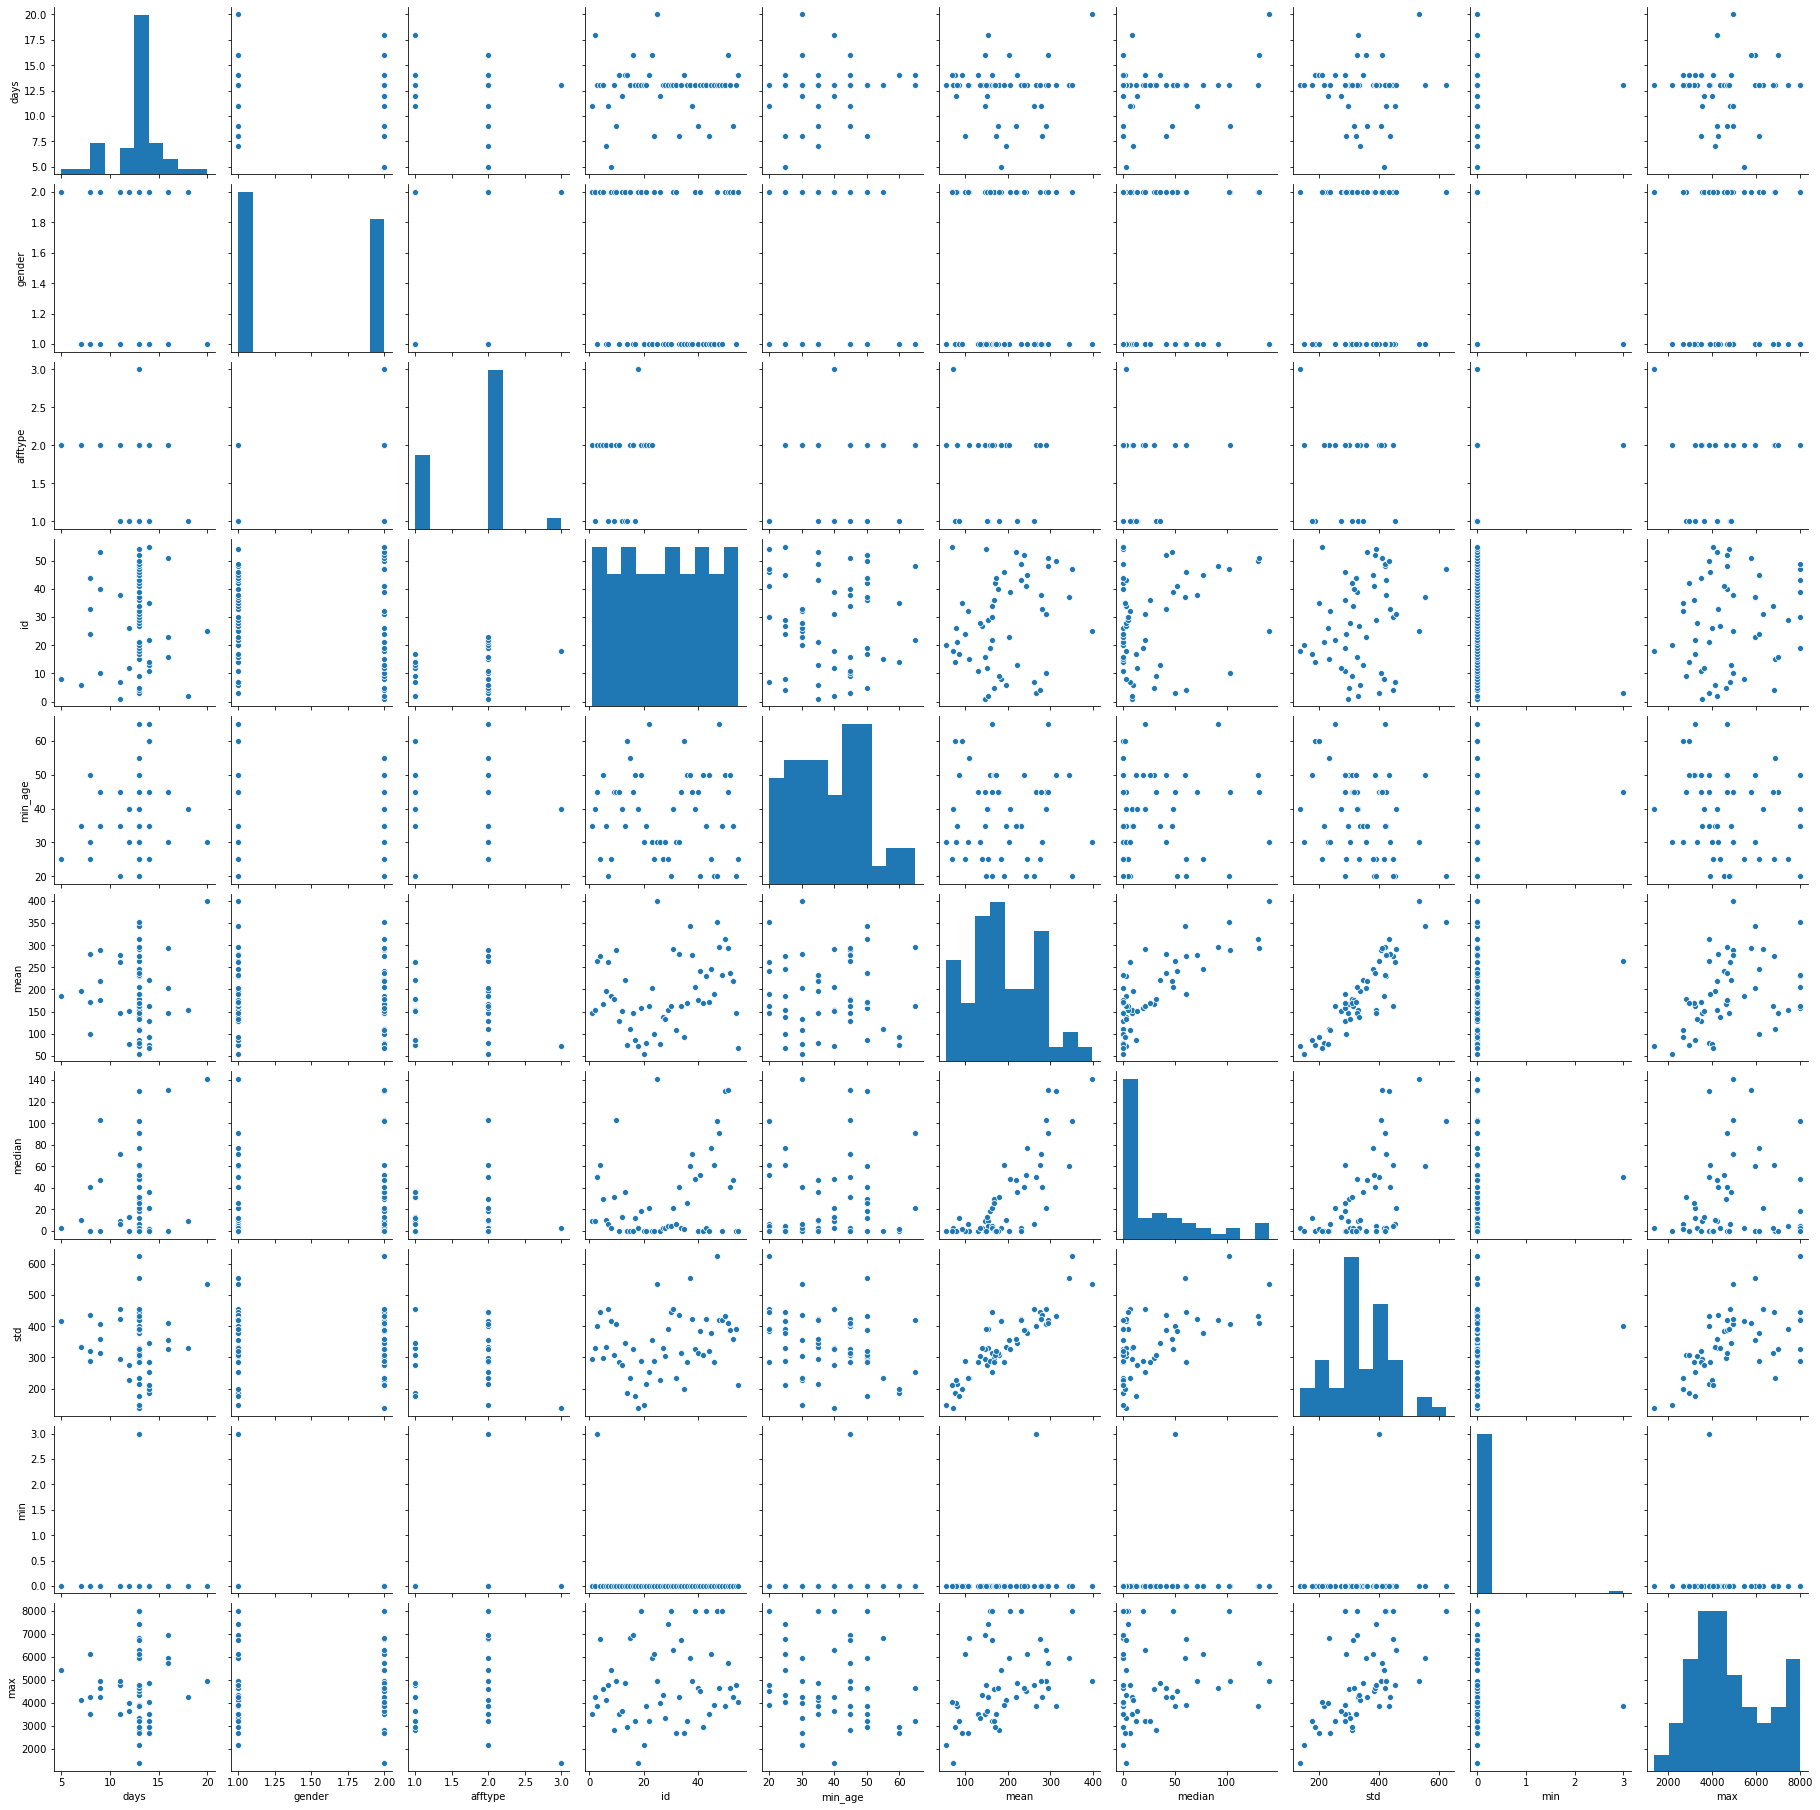

In [41]:
sns.pairplot(ready)

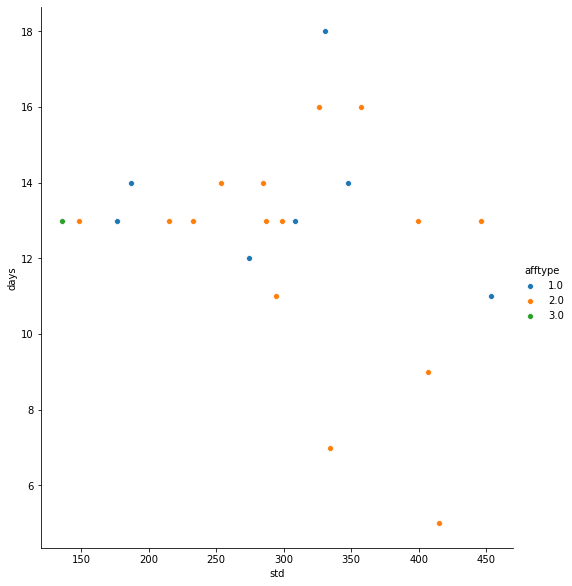

In [42]:
sns.pairplot(ready, x_vars = ['std'], y_vars = ['days'], hue = 'afftype', height= 8, aspect= 0.9)

Let's plot correlational matrix

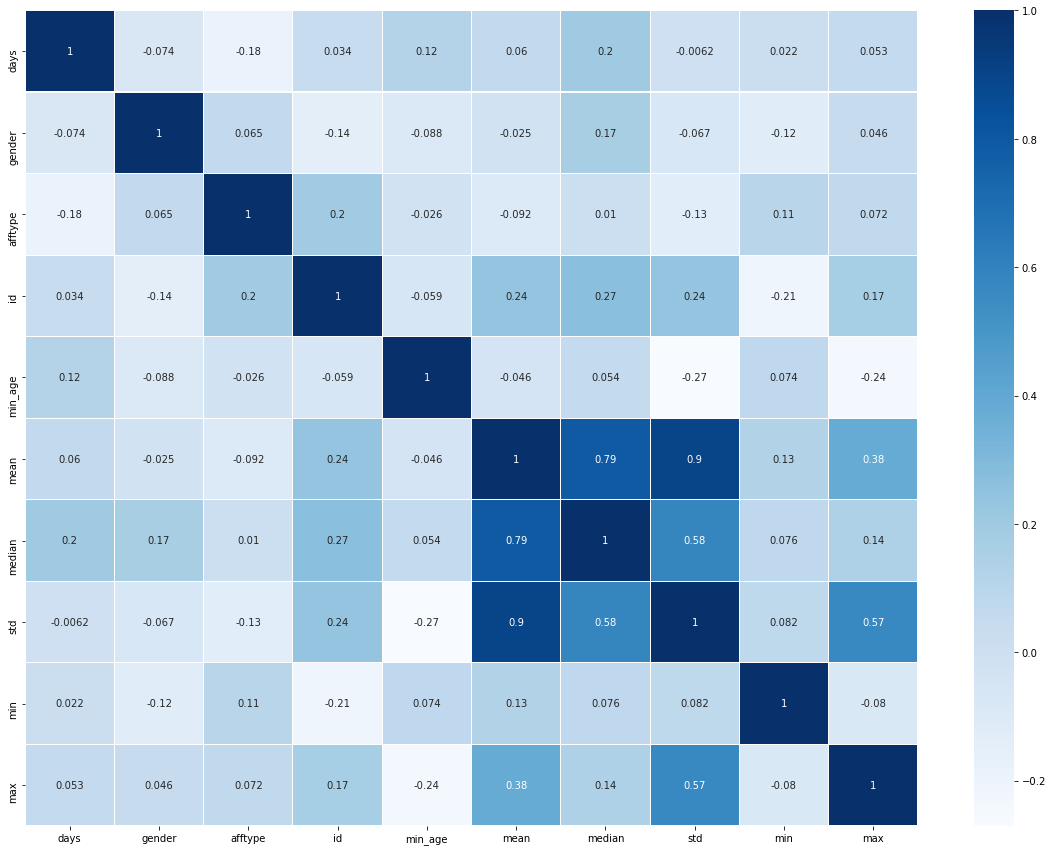

In [43]:
plt.figure(figsize=(20,15))

heart_corr = ready.corr()

sns.heatmap(heart_corr, cmap="Blues",
           linewidth=0.1,annot=True)
plt.show()

In [44]:
def to_binary(value):
    return 0 if value == 2 else 1

ready['afftype'] = ready['afftype'].apply(lambda x: 0 if x == 2 else 1)

ready.head()

,days,gender,afftype,id,min_age,mean,median,std,min,max
0,11,2,0,1.0,35,146.95,9.0,294.59,0,3526
1,18,2,1,2.0,40,153.66,9.0,330.80,0,4228
2,13,1,0,3.0,45,265.30,50.0,399.88,3,3847
3,13,2,0,4.0,25,274.87,61.0,446.05,0,6776
4,13,2,0,5.0,50,167.25,30.0,298.72,0,4609


In [45]:
# Берем максимальное значение из двух классов
max_size = ready['afftype'].value_counts().max()

# Создаем массив из существуещего датафрейма
lst = [ready]

# Для меньшего класса увеличиваем его данные с помощью копирования наших данных
for class_index, group in ready.groupby('afftype'):
    lst.append(group.sample(max_size-len(group), replace=True))
ready = pd.concat(lst)

ready

,days,gender,afftype,id,min_age,mean,median,std,min,max
0,11,2,0,1.0,35,146.95,9.0,294.59,0,3526
1,18,2,1,2.0,40,153.66,9.0,330.80,0,4228
2,13,1,0,3.0,45,265.30,50.0,399.88,3,3847
3,13,2,0,4.0,25,274.87,61.0,446.05,0,6776
4,13,2,0,5.0,50,167.25,30.0,298.72,0,4609
...,...,...,...,...,...,...,...,...,...,...
3,13,2,0,4.0,25,274.87,61.0,446.05,0,6776
2,13,1,0,3.0,45,265.30,50.0,399.88,3,3847
22,16,1,0,23.0,30,202.62,0.0,357.37,0,5931
22,16,1,0,23.0,30,202.62,0.0,357.37,0,5931


In [46]:
ready.drop('min', axis = 1, inplace = True)

In [47]:
train = ready[ready['id'] < 24]
test = ready[ready['id'] >= 24]

Here I will do binary classification: 0 for unipolar, 1 for bipolar

In [48]:
train_X = train.drop(['afftype', 'id'], axis = 1)
train_y = train['afftype']

Firstly let's start with logitic regression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score, precision_recall_curve

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train_X)
train_X = scaler.transform(train_X)

In [51]:
logreg = LogisticRegression(random_state = 42)

In [52]:
logreg.fit(train_X, train_y)

LogisticRegression(random_state=42)

In [53]:
prediction = logreg.predict(train_X)

In [54]:
#Let's firstly check accuracy score

accuracy_score(train_y, prediction)

0.8958333333333334

73%, looks ok, but let's discover result with another metrics

In [55]:
f1_score(prediction, train_y)

0.5454545454545454

Well, well

In [56]:
recall_score(prediction, train_y)

1.0

In [57]:
precision_score(prediction, train_y)

0.375

Both, precision and recall do not look great

In [58]:
confusion_matrix(prediction, train_y)

array([[40,  5],
       [ 0,  3]], dtype=int64)

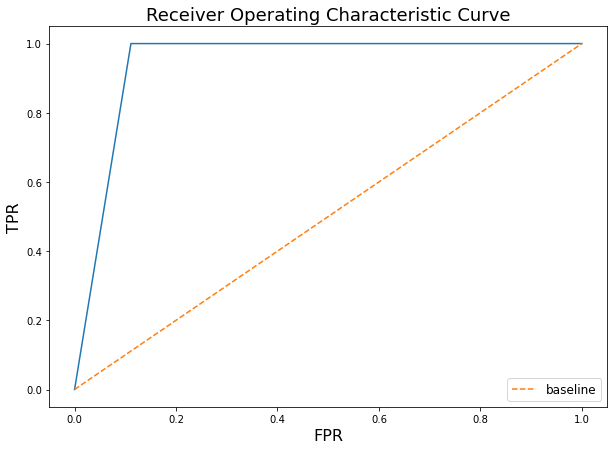

In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(prediction, train_y)

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(fpr, tpr)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plt.title('Receiver Operating Characteristic Curve', fontsize=18)
plt.ylabel('TPR', fontsize=16)
plt.xlabel('FPR', fontsize=16)
plt.legend(fontsize=12);

Well, Let's tune this Logistic Regression model

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [50, 100, 150],
    'warm_start': [True, False],
    'penalty': ['l1', 'l2']
}

In [62]:
grid_search = GridSearchCV(logreg, params_grid, cv = 5, scoring = 'f1')

In [63]:
grid_search.fit(train_X, train_y)

C:\python\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\python\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\python\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\python\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'max_iter': [50, 100, 150], 'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga'],
                         'warm_start': [True, False]},
             scoring='f1')

In [64]:
prediction = grid_search.best_estimator_.predict(train_X)

In [65]:
accuracy_score(prediction, train_y)

0.8958333333333334

In [66]:
f1_score(prediction, train_y)

0.5454545454545454

In [67]:
recall_score(prediction, train_y)

1.0

In [68]:
precision_score(prediction, train_y)

0.375

In [69]:
confusion_matrix(prediction, train_y)

array([[40,  5],
       [ 0,  3]], dtype=int64)

In [70]:
test_X = test.drop(['afftype', 'id'], axis = 1)

test_X = scaler.transform(test_X)

In [71]:
grid_search.predict_proba(test_X)

array([[0.95851229, 0.04148771],
       [0.7007198 , 0.2992802 ],
       [0.71550838, 0.28449162],
       [0.81992325, 0.18007675],
       [0.69496172, 0.30503828],
       [0.97352962, 0.02647038],
       [0.98001751, 0.01998249],
       [0.80169852, 0.19830148],
       [0.43190064, 0.56809936],
       [0.90389584, 0.09610416],
       [0.9580428 , 0.0419572 ],
       [0.60915013, 0.39084987],
       [0.71010033, 0.28989967],
       [0.8980843 , 0.1019157 ],
       [0.9253802 , 0.0746198 ],
       [0.97129508, 0.02870492],
       [0.91549533, 0.08450467],
       [0.70281108, 0.29718892],
       [0.57833496, 0.42166504],
       [0.97294062, 0.02705938],
       [0.8557768 , 0.1442232 ],
       [0.96253868, 0.03746132],
       [0.85839103, 0.14160897],
       [0.96147493, 0.03852507],
       [0.88834493, 0.11165507],
       [0.97173206, 0.02826794],
       [0.7401031 , 0.2598969 ],
       [0.86881866, 0.13118134],
       [0.69040935, 0.30959065],
       [0.82739195, 0.17260805],
       [0.